<a href="https://colab.research.google.com/github/tejaswaroop2310/Customer-Segmentation/blob/main/Onlinf_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#<b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

#<b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
#Read the data from the excel 

df= pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
#Copy the data for reference.
cp=df.copy(deep=False)

In [ ]:
#First five records of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#shape of the data
df.shape

(541909, 8)

This is a huge dataset with more than 50 lakhs of records 

#Data Preprocessing

In [ ]:
#check the missing values in the data set
df.isnull().sum()/df.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

* There are missing values in two labels __Description__ and  __CustomerID__
* We have lots of null values in __CustomerID__ column. These entries are not much of use to analyze data for customers.Since we have very large data set we can ignore these entries and remove them from the dataset.

In [ ]:
# drop missing values
df.dropna(subset=['CustomerID'], inplace=True)


In [ ]:
#Check Missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#shape of the data
df.shape

(406829, 8)

Now lets check the dataset if they are any duplicate records in the dataset

In [ ]:
#Check Duplicates
df.duplicated().sum()

5225

There are 5225 duplicate records in the dataset

In [ ]:
#Drop Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Shape of the dataframe
df.shape

(401604, 8)

In [ ]:
#Check the unique values in the dataframe 
df.Quantity.unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

You can see there are many negative  values in the __Quantity__ column,Lets deep dive into the __Quantity__ column
 

In [ ]:
#Dataframe with negative values of Quantity
negative=df[df['Quantity']<0]

In [ ]:
#First five records
negative.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


* Here we can see the __InvoiceNo__ is starts with __C__
* With My intution , I am consider this records as cancelled records, So we can remove this records from the dataset

In [ ]:
#Data with positive value of Quantity column
df=df[df['Quantity']>0]

In [ ]:
#First five records of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Shape of the data
df.shape

(392732, 8)

# Data visualization

In [ ]:
#Group the data of  country column
country= df.groupby('Country').count().reset_index()

In [ ]:
#First five records fo country Dataframe
country.head()

,Country,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,Australia,1184,1184,1184,1184,1184,1184,1184
1,Austria,398,398,398,398,398,398,398
2,Bahrain,17,17,17,17,17,17,17
3,Belgium,2031,2031,2031,2031,2031,2031,2031
4,Brazil,32,32,32,32,32,32,32


In [ ]:
#sort values based on count of InvoiceNo
country.sort_values('InvoiceNo', ignore_index=True, ascending=False, inplace=True)

In [ ]:
country.head()

,Country,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,United Kingdom,349227,349227,349227,349227,349227,349227,349227
1,Germany,9027,9027,9027,9027,9027,9027,9027
2,France,8327,8327,8327,8327,8327,8327,8327
3,EIRE,7228,7228,7228,7228,7228,7228,7228
4,Spain,2480,2480,2480,2480,2480,2480,2480


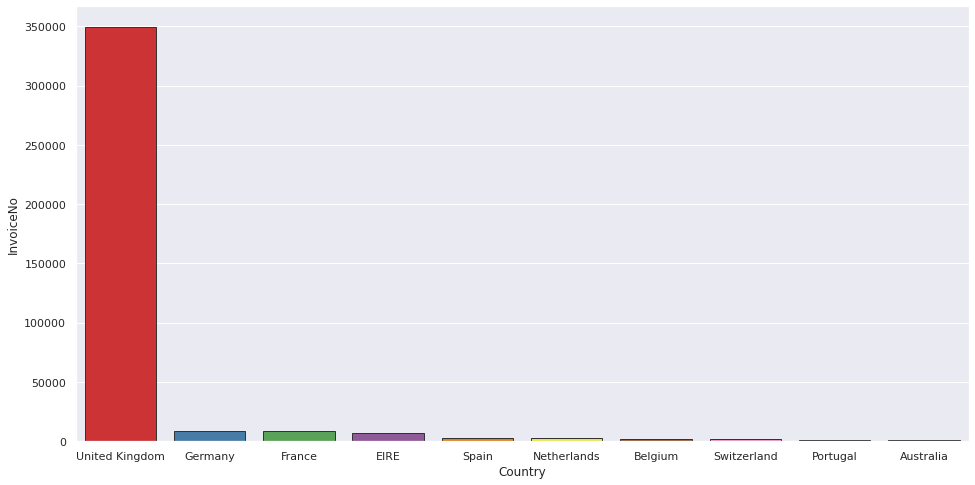

In [ ]:
#bar plot for the countries
fig, axes = plt.subplots(figsize=(16,8))
sns.barplot(data=country[0:10], x='Country', y='InvoiceNo',linewidth=1, edgecolor='0.2',palette="Set1")


Most of the transactions are done my __United Kingdom__

In [ ]:
#get the value count of description column
Description=df['Description'].value_counts().reset_index()

In [ ]:
#Rename the coloumns names
Description.rename(columns={'index': 'Product_Name'}, inplace=True)
Description.rename(columns={'Description': 'Count'}, inplace=True)

In [ ]:
Description.head()

,Product_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

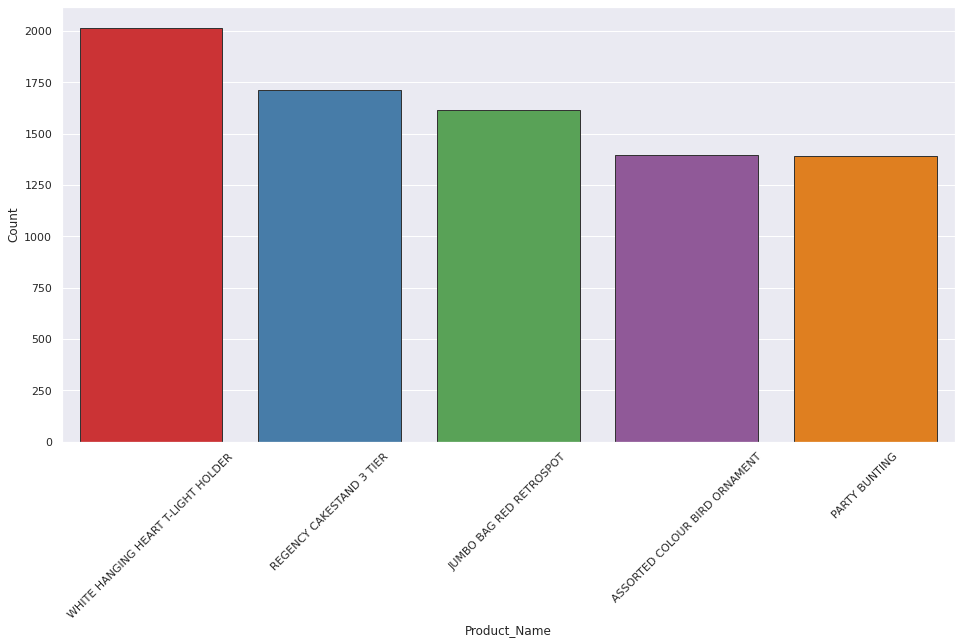

In [ ]:
#count plot for product name 
fig, axes = plt.subplots(figsize=(16,8))

sns.barplot( x='Product_Name', y='Count',  linewidth=1, edgecolor='0.2',data=Description[0:5],palette="Set1")
plt.xticks(rotation=45)


In [ ]:
# get month from datetime object
df['Month'] = df['InvoiceDate'].apply(lambda x: x.month)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


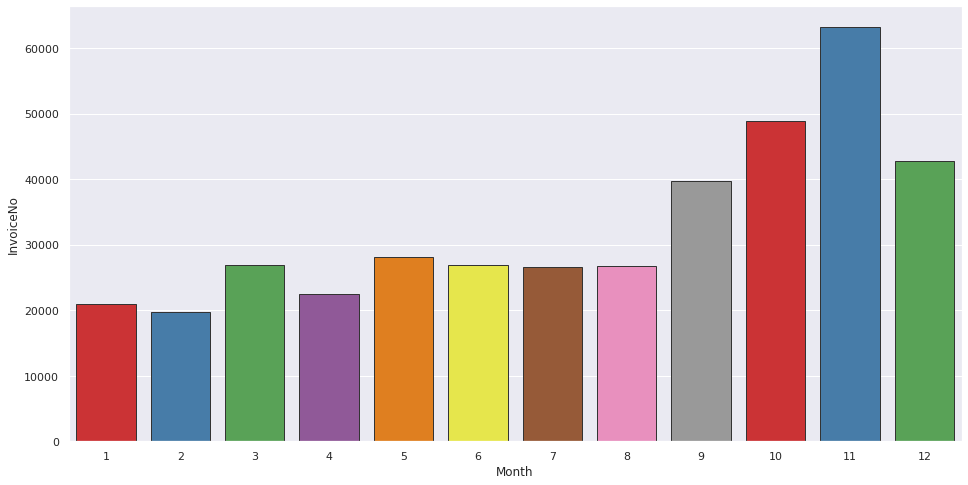

In [ ]:
# plot sales for every month
month_df = df.groupby('Month').count().reset_index()
fig, axes = plt.subplots(figsize=(16,8))
sns.barplot(data=month_df, x='Month', y='InvoiceNo', ax=axes, linewidth=1, edgecolor='0.2',palette="Set1")

# Cohert Analysis


Cohort analysis is a descriptive analytics tool. It groups the customers into mutually exclusive cohorts - which are then measured over time. Cohort analysis provides deeper insights than the so-called vanity metrics. It helps with understanding the high level trends better by providing insights on metrics across both the product and the customer lifecycle

* __Time cohort__ are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly, even daily.  
* __Behavior cohorts__ are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understanding the needs of the various cohorts can help a company design custom-made services or products for particular segments.
*  __Size cohorts__ refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some period of time after acquisition, or the product type that the customer spent most of their order amount in some period of time. Now, let's look at the main elements of the cohort analysis.

Firstly, we create a function that truncates a given date object to a first day of the month. Then we apply it to the InvoiceDate and create an InvoiceMonth column.

In [ ]:
#fucntion to get month from invoice date
import datetime as dt
def get_month(x): return dt.datetime(x.year,x.month,1)
cp['InvoiceMonth']=cp['InvoiceDate'].apply(get_month)


we create a groupby() object with CustomerID, and use the InvoiceMonth column for the further manipulation. Finally, we use transform() together with a min() function to assign the smallest InvoiceMonth value to each customer

In [ ]:
#groping  customer ID with Invoice Month
grouping =cp.groupby('CustomerID')['InvoiceMonth']
cp['CohertMonth']=grouping.transform(min)

In [ ]:
#first 5 records of the data
cp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohertMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


we will first create a helper function which will extract integer values of the year, month and day from a datetime() object.

In [ ]:
#function to get the date
def get_date_int(cp,column):
  year=cp[column].dt.year
  month=cp[column].dt.month
  day=cp[column].dt.day
  return year,month,day

Now, we will calculate the number of months between any transaction and the first transaction for each customer. We will use the InvoiceMonth and CohortMonth values to do this

In [ ]:
#get the number of months between transactions
invoice_year,invoice_month,_=get_date_int(cp,'InvoiceMonth')
cohort_year,cohert_month,_= get_date_int(cp,'CohertMonth')
year_diff=invoice_year-cohort_year
month_diff=invoice_month-cohert_month
cp['cohert_index']=(year_diff*12+month_diff+1)
cp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohertMonth,cohert_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0


In [ ]:
#group data with Cohert month and cohert index
grouping1=cp.groupby(['CohertMonth','cohert_index'])

In [ ]:
#Get the count for every cohert
cohert_data=grouping1['CustomerID'].apply(pd.Series.nunique)
cohert_data=cohert_data.reset_index()
cohert_counts= cohert_data.pivot(index='CohertMonth',columns='cohert_index',values='CustomerID')

In [ ]:
cohert_counts

cohert_index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohertMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention measures how many customers from each of the cohort have returned in the subsequent months. We will use the dataframe called cohort_counts which we created .

In [ ]:
#cohert count in percentage
cohert_size=cohert_counts.iloc[:,0]
retention=cohert_counts.divide(cohert_size,axis=0)
retention.round(3)*100

cohert_index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohertMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RFM Analysis

RFM values:
*  __Recency__ is just the number of days since the last transaction of the customer - the lower it is, the better, since every company wants its customers to be recent and active. 
* __Frequency__ calculates the number of transactions in the last 12 months, although there are variations such as average monthly transactions which depict the essence of this metric as well. And third, 
* __Monetary__ value is just the total value that the customer has spent with the company in the last 12 months. One comment though - the 12 months is a standard way to do this, but it can be chosen arbitrarily depending on the business model and the lifecycle of the products and customers.

In [ ]:
#create Monetery Value column 
df['MonetaryValue'] = df.apply(lambda x: x['Quantity'] * x['UnitPrice'], axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,MonetaryValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [ ]:
#group the data with CustomerID
data_rfm = df.groupby('CustomerID').sum().reset_index()
data_rfm.head()

,CustomerID,Quantity,UnitPrice,Month,MonetaryValue
0,12346.0,74215,1.04,1,77183.60
1,12347.0,2458,481.21,1383,4310.00
2,12348.0,2341,178.71,257,1797.24
3,12349.0,631,605.10,803,1757.55
4,12350.0,197,65.30,34,334.40


The online dataset has already been pre-processed and only includes the recent 12 months of data. We can confirm that by viewing min() and max() of the InvoiceDate which you can see covers the full year.

In the real world, we would be working with the most recent snapshot of the data of today or yesterday, but in this case the data comes from 2010 and 2011, so we have to create a hypothetical snapshot date that we'll use as a starting point to calculate metrics as if we're doing the analysis on the most recent data

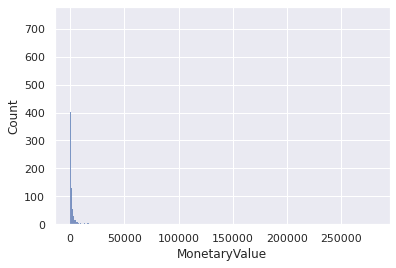

In [ ]:
# plot Monetary value 

sns.histplot(data_rfm['MonetaryValue'])

In [ ]:
#Drop unnecessary columns
data_rfm.drop(columns=['Quantity', 'UnitPrice', 'Month'], inplace=True)

we will rate customers who have been active more recently better than the less recent customers. We pass these labels to the qcut() function which sorts the customers by their recency values in an increasing order and then assigns values from 4 to 1 based on the quartile they fall to.

In [ ]:
#create Frequency column with groupby 
data_rfm['Frequency'] = df.groupby('CustomerID')['MonetaryValue'].count().values
data_rfm.head()

,CustomerID,MonetaryValue,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


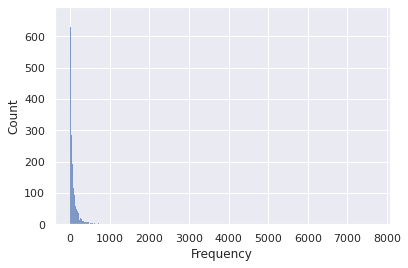

In [ ]:
# plot Frequency
sns.histplot(data_rfm['Frequency'])

Now, we do the same thing for Frequency and Monetary Value. The first difference is that the labels have a different order than recency, because frequency and monetary values are considered better when they are higher: we want customers to spend more and visit more often. Hence, we assign higher labels to higher values.

In [ ]:
from datetime import date
# we have data till date 09/12/2011
# we will take next day as last date for calculation of time in number of days
last_date = date(2011,12,10)
# calculate time in days since last purchase order till the date
# get Monetary Value for each customer from quantity and unit price
df['Recency'] = df['InvoiceDate'].apply(lambda x: (last_date - pd.to_datetime(x).date()).days)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,MonetaryValue,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374


In [ ]:
#create Recency colunm 
data_rfm['Recency'] = df.groupby('CustomerID')['Recency'].min().values
data_rfm.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,77183.60,1,326
1,12347.0,4310.00,182,3
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


Now the final step is to create the RFM Segment which is just a concatenated string of RFM values, and the RFM Score which is the sum of RFM values

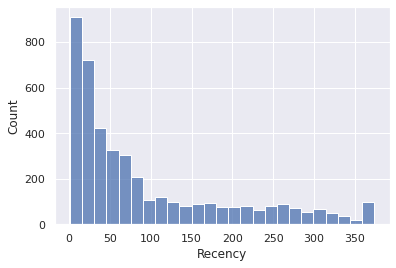

In [ ]:
# plot Recency
sns.histplot(data_rfm['Recency'])

In [ ]:
data_rfm.describe()

,CustomerID,MonetaryValue,Frequency,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2048.215924,90.512100,93.041484
std,1721.889758,8984.248352,225.515328,100.007757
min,12346.000000,0.000000,1.000000,1.000000
25%,13812.500000,306.455000,17.000000,18.000000
50%,15299.000000,668.560000,41.000000,51.000000
75%,16778.500000,1660.315000,98.000000,142.500000
max,18287.000000,280206.020000,7676.000000,374.000000


In [ ]:
# apply log transformation to remove skewness
# the minimum value for MonetaryValue is 0
# we need to add a small number to log transform this value (log of 0 will result in negative infinity)
data_rfm['MonetaryValue'] = data_rfm['MonetaryValue'].apply(lambda x: np.log(x + 1)) # add 1 for free items in sales
data_rfm['Frequency'] = data_rfm['Frequency'].apply(lambda x: np.log(x))
data_rfm['Recency'] = data_rfm['Recency'].apply(lambda x: np.log(x))
data_rfm.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,11.253955,0.000000,5.786897
1,12347.0,8.368925,5.204007,1.098612
2,12348.0,7.494564,3.433987,4.330733
3,12349.0,7.472245,4.290459,2.944439
4,12350.0,5.815324,2.833213,5.739793


K-means assumes each variable has equal average value, and equal variance. We will use recency, frequency, and monetary values for the clustering and in the next lesson you will see that they don't meet any of the criteria. We will then have to go through necessary pre-processing steps before anything else. By calling the "describe" function on a dataframe you will get a list of key statistics. Here we see that both the average values as well as standard deviations are different between the three variables.

In [ ]:
data_rfm.describe()


,CustomerID,MonetaryValue,Frequency,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,6.587044,3.670868,3.800803
std,1721.889758,1.262262,1.321685,1.383560
min,12346.000000,0.000000,0.000000,0.000000
25%,13812.500000,5.728329,2.833213,2.890372
50%,15299.000000,6.506621,3.713572,3.931826
75%,16778.500000,7.415365,4.584967,4.959336
max,18287.000000,12.543284,8.945854,5.924256


Text(0.5, 0.98, 'Data distribution after log transform')

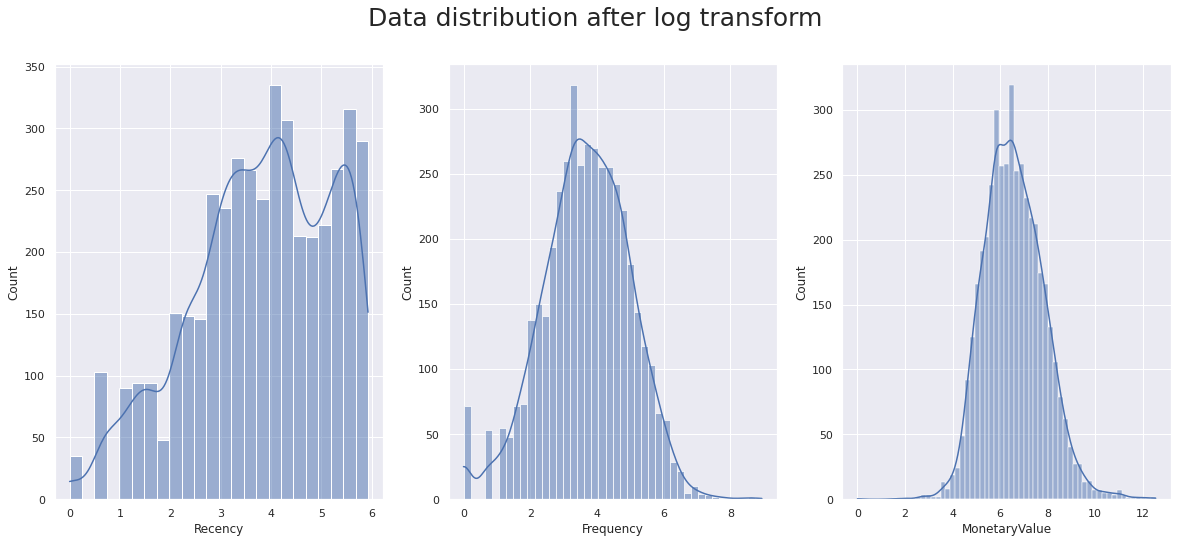

In [ ]:
# plot the data distribution after log transform

fig, axis = plt.subplots(nrows=1, ncols= 3, figsize=(20,8))
sns.histplot(data_rfm['Recency'], ax=axis[0],kde=True)
sns.histplot(data_rfm['Frequency'], ax=axis[1],kde=True)
sns.histplot(data_rfm['MonetaryValue'], ax=axis[2],kde=True)
fig.suptitle("Data distribution after log transform", size=25)

Text(0.5, 0.92, 'Data Visualization')

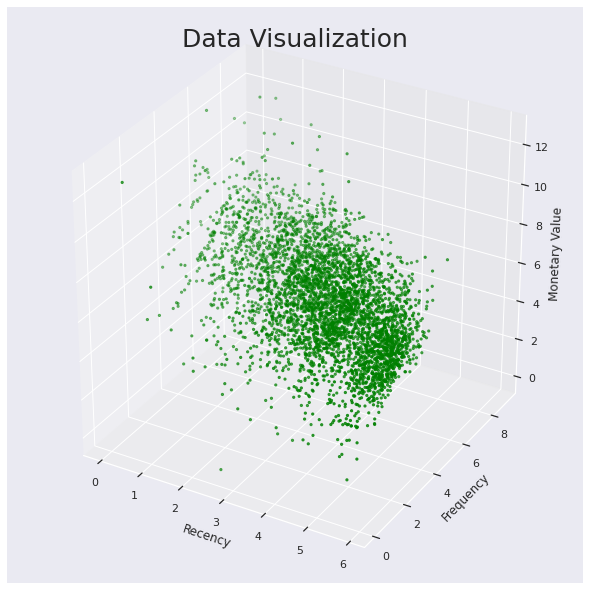

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# plot data points in 3D space
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = data_rfm['Recency']
y = data_rfm['Frequency']
z = data_rfm['MonetaryValue']
ax.scatter(x, y, z, marker='.',c='green')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.title("Data Visualization", size=25)

In [ ]:
data_rfm.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,11.253955,0.000000,5.786897
1,12347.0,8.368925,5.204007,1.098612
2,12348.0,7.494564,3.433987,4.330733
3,12349.0,7.472245,4.290459,2.944439
4,12350.0,5.815324,2.833213,5.739793


In [ ]:
# CustomerID does not provide any information in clusturing 
# remove the column from data
data = data_rfm.drop(columns=['CustomerID'])
data.head()

,MonetaryValue,Frequency,Recency
0,11.253955,0.000000,5.786897
1,8.368925,5.204007,1.098612
2,7.494564,3.433987,4.330733
3,7.472245,4.290459,2.944439
4,5.815324,2.833213,5.739793


# Kmeans Clustering 

In [ ]:
from sklearn.cluster import KMeans
# calculate Elbow method scores
sse = {} # sum of squared errors
# use cluster from range 1 to 20
for k in range(1, 21):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit KMeans on the dataset
    kmeans.fit(data)
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_ # Used for Plotting the elbow plot

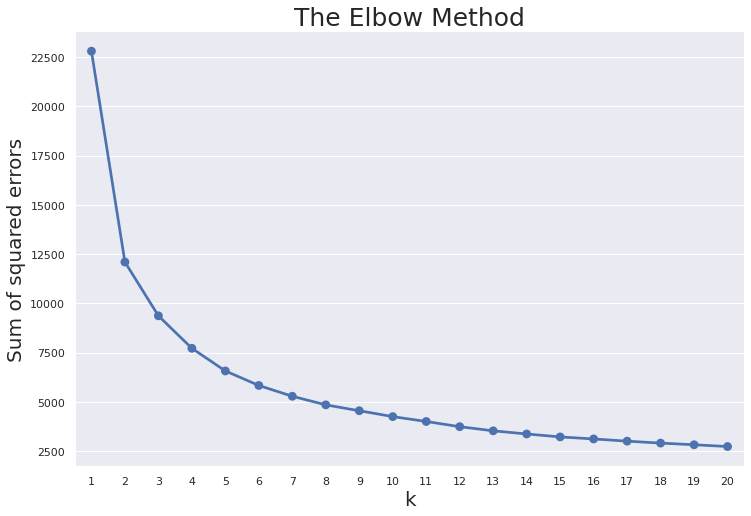

In [ ]:
# the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method', size=25)
plt.xlabel('k', size=20); 
plt.ylabel('Sum of squared errors', size=20)
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

For n_clusters = 2 The average silhouette_score is : 0.39428866970758136
For n_clusters = 3 The average silhouette_score is : 0.3008512346789873
For n_clusters = 4 The average silhouette_score is : 0.306375685072073
For n_clusters = 5 The average silhouette_score is : 0.28109874044423216
For n_clusters = 6 The average silhouette_score is : 0.2795787714593425
For n_clusters = 7 The average silhouette_score is : 0.2672558587536175
For n_clusters = 8 The average silhouette_score is : 0.26492221606062183


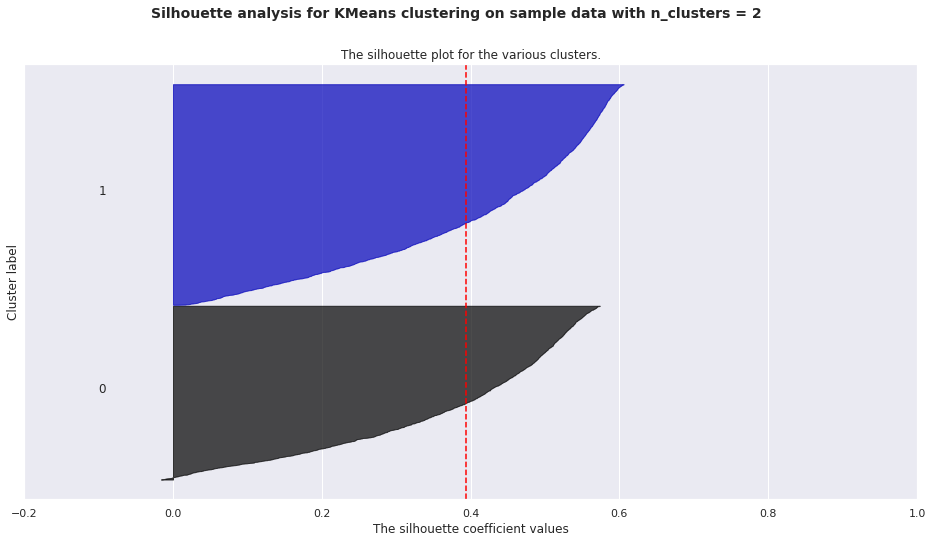

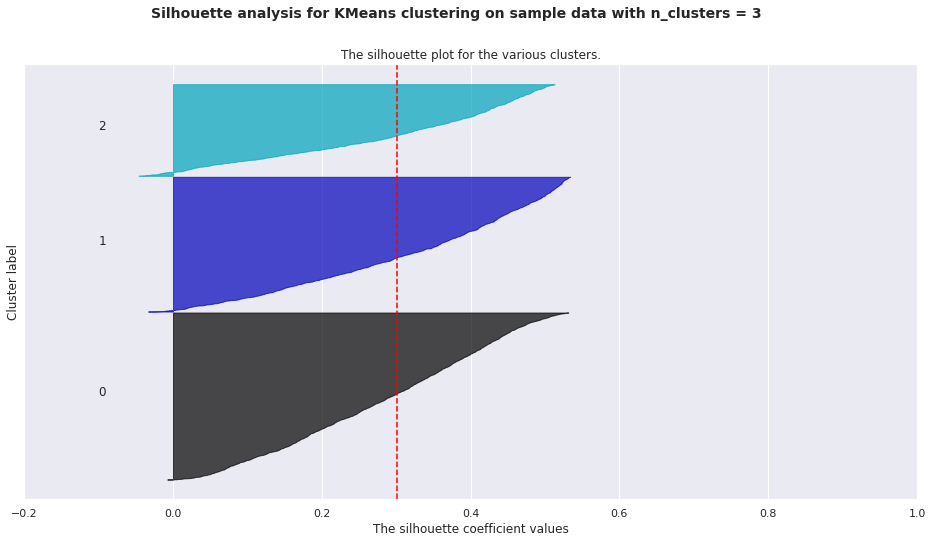

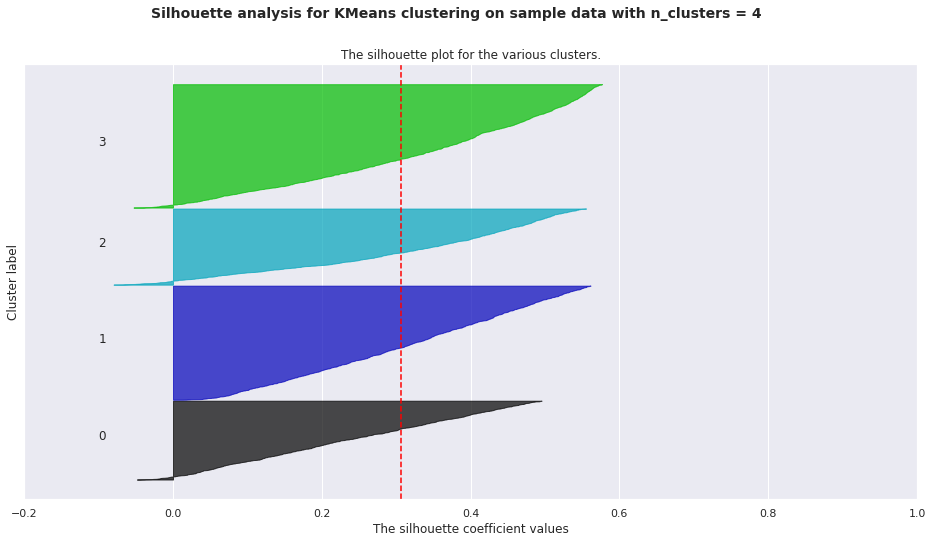

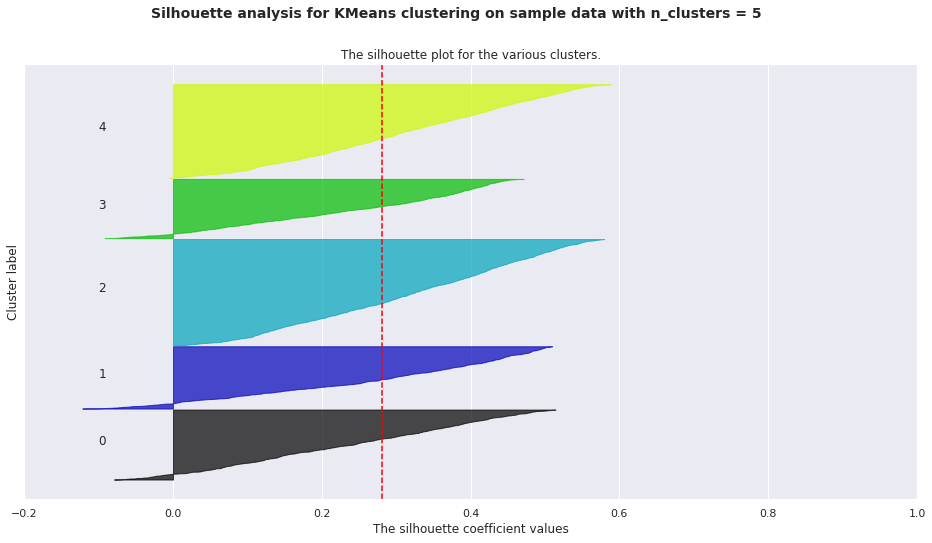

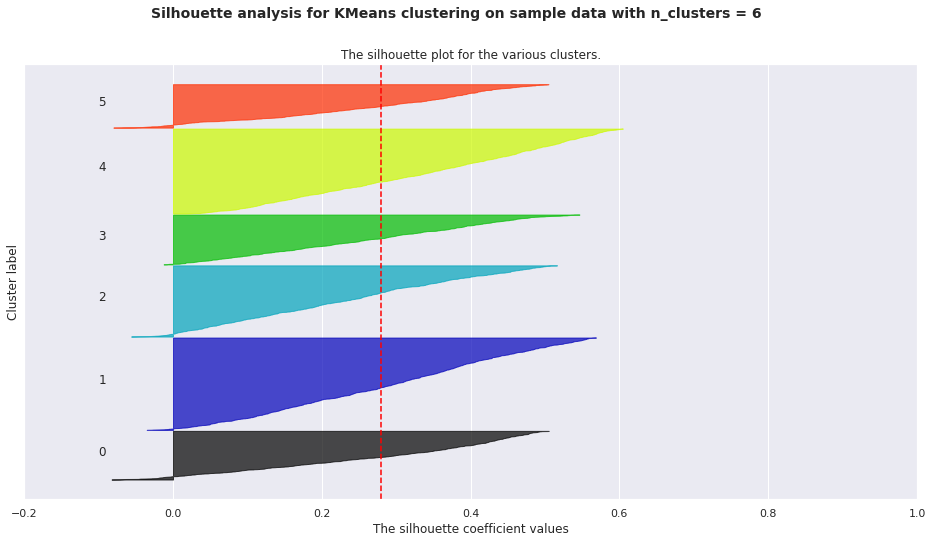

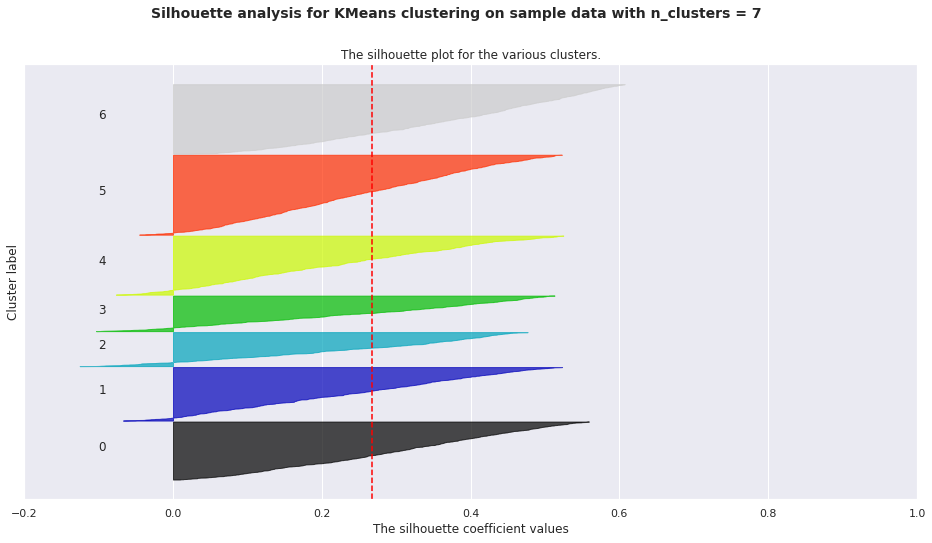

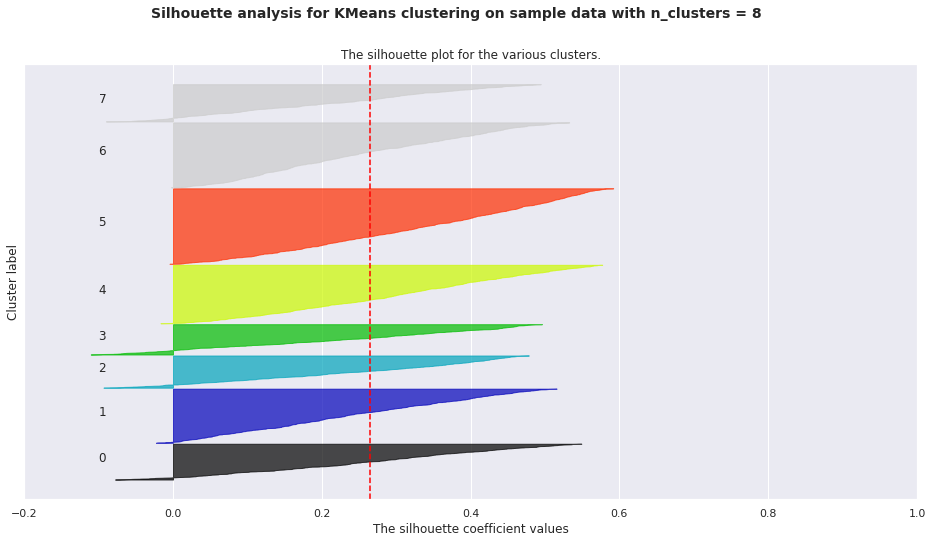

In [ ]:
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
# make a list of clusters to check
clusters_list = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in clusters_list:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    fig, axis = plt.subplots(figsize=(16,8))
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 6)
        axis.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axis.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axis.set_title("The silhouette plot for the various clusters.")
    axis.set_xlabel("The silhouette coefficient values")
    axis.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axis.axvline(x=silhouette_avg, color="red", linestyle="--")

    axis.set_yticks([])  # Clear the yaxis labels / ticks
    axis.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
   
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

From the first look our segmentation does make sense. In reality it can take multiple takes of trial and error to find the right cut-offs. Further we will use k-means clustering to build these segments without arbitrary chosen thresholds.

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=1)
cluster_labels = clusterer.fit_predict(data)

Text(0.5, 0.92, 'Data Visualization')

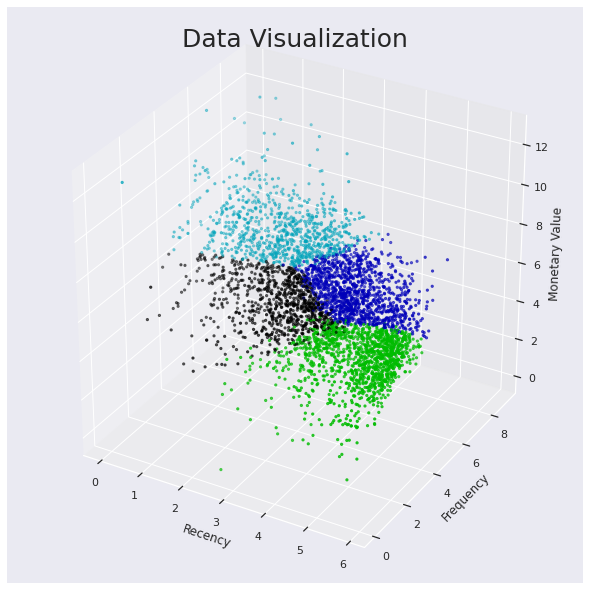

In [ ]:
# plot data points in 3D space
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = data['Recency']
y = data['Frequency']
z = data['MonetaryValue']
colors = cm.nipy_spectral(cluster_labels.astype(float) /6)
ax.scatter(x, y, z, c=colors, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.title("Data Visualization", size=25)

In [ ]:
# add cluster label to each data point
data_rfm['Cluster'] = cluster_labels
data_rfm.head()

,CustomerID,MonetaryValue,Frequency,Recency,Cluster
0,12346.0,11.253955,0.000000,5.786897,1
1,12347.0,8.368925,5.204007,1.098612,2
2,12348.0,7.494564,3.433987,4.330733,1
3,12349.0,7.472245,4.290459,2.944439,1
4,12350.0,5.815324,2.833213,5.739793,3


In [ ]:
# calculate mean of each feature for clusters
cluster_df = data_rfm.groupby('Cluster').mean()
cluster_df

,CustomerID,MonetaryValue,Frequency,Recency
Cluster,,,,
0,15385.758028,6.143950,3.363346,2.768893
1,15241.379857,7.047518,4.205547,4.303173
2,15176.549881,8.208462,5.282323,2.113863
3,15375.373900,5.443705,2.378407,5.037416


In [ ]:
# drop unnecessary column
cluster_df.drop(columns=['CustomerID'], inplace=True)

In [ ]:
# We have log-transformed the features now to get more intuition take exponential of each feature
cluster_df = cluster_df.applymap(np.exp)
cluster_df = cluster_df.applymap(int)
cluster_df

,MonetaryValue,Frequency,Recency
Cluster,,,
0,465,28,15
1,1150,67,73
2,3671,196,8
3,231,10,154


# Summary

* 85 % of the transactions are done from United Kingdom
* Orders are more in November month compared to other months
* Cohert Analysis helps observe the retention rate of the customers



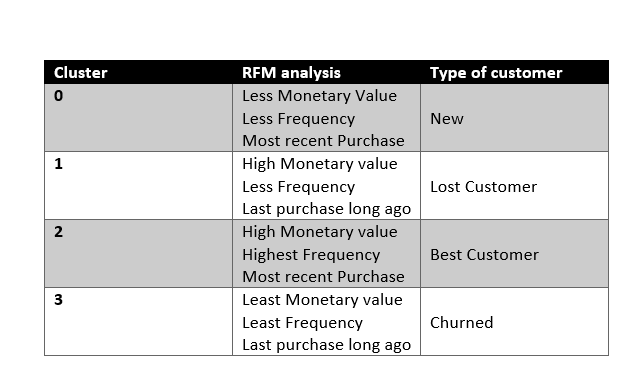